In [40]:
from analitico import disponibilidade_vec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [41]:
# gerar dados com combinações de valores de n, k e p
n = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
k = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
p = np.linspace(0, 1, 100)
dados = pd.DataFrame(
    [(ni, ki, pi) for ni in n for ki in k for pi in p if ki <= ni],  # escolhendo combinações de n, k e p em que k <= n
    columns=["n", "k", "p"],
)
dados["d"] = disponibilidade_vec(dados["n"], dados["k"], dados["p"])
dados

,n,k,p,d
0,1,1,0.000000,0.000000
1,1,1,0.010101,0.010101
2,1,1,0.020202,0.020202
3,1,1,0.030303,0.030303
4,1,1,0.040404,0.040404
...,...,...,...,...
5495,10,10,0.959596,0.662040
5496,10,10,0.969697,0.735124
5497,10,10,0.979798,0.815390
5498,10,10,0.989899,0.903460


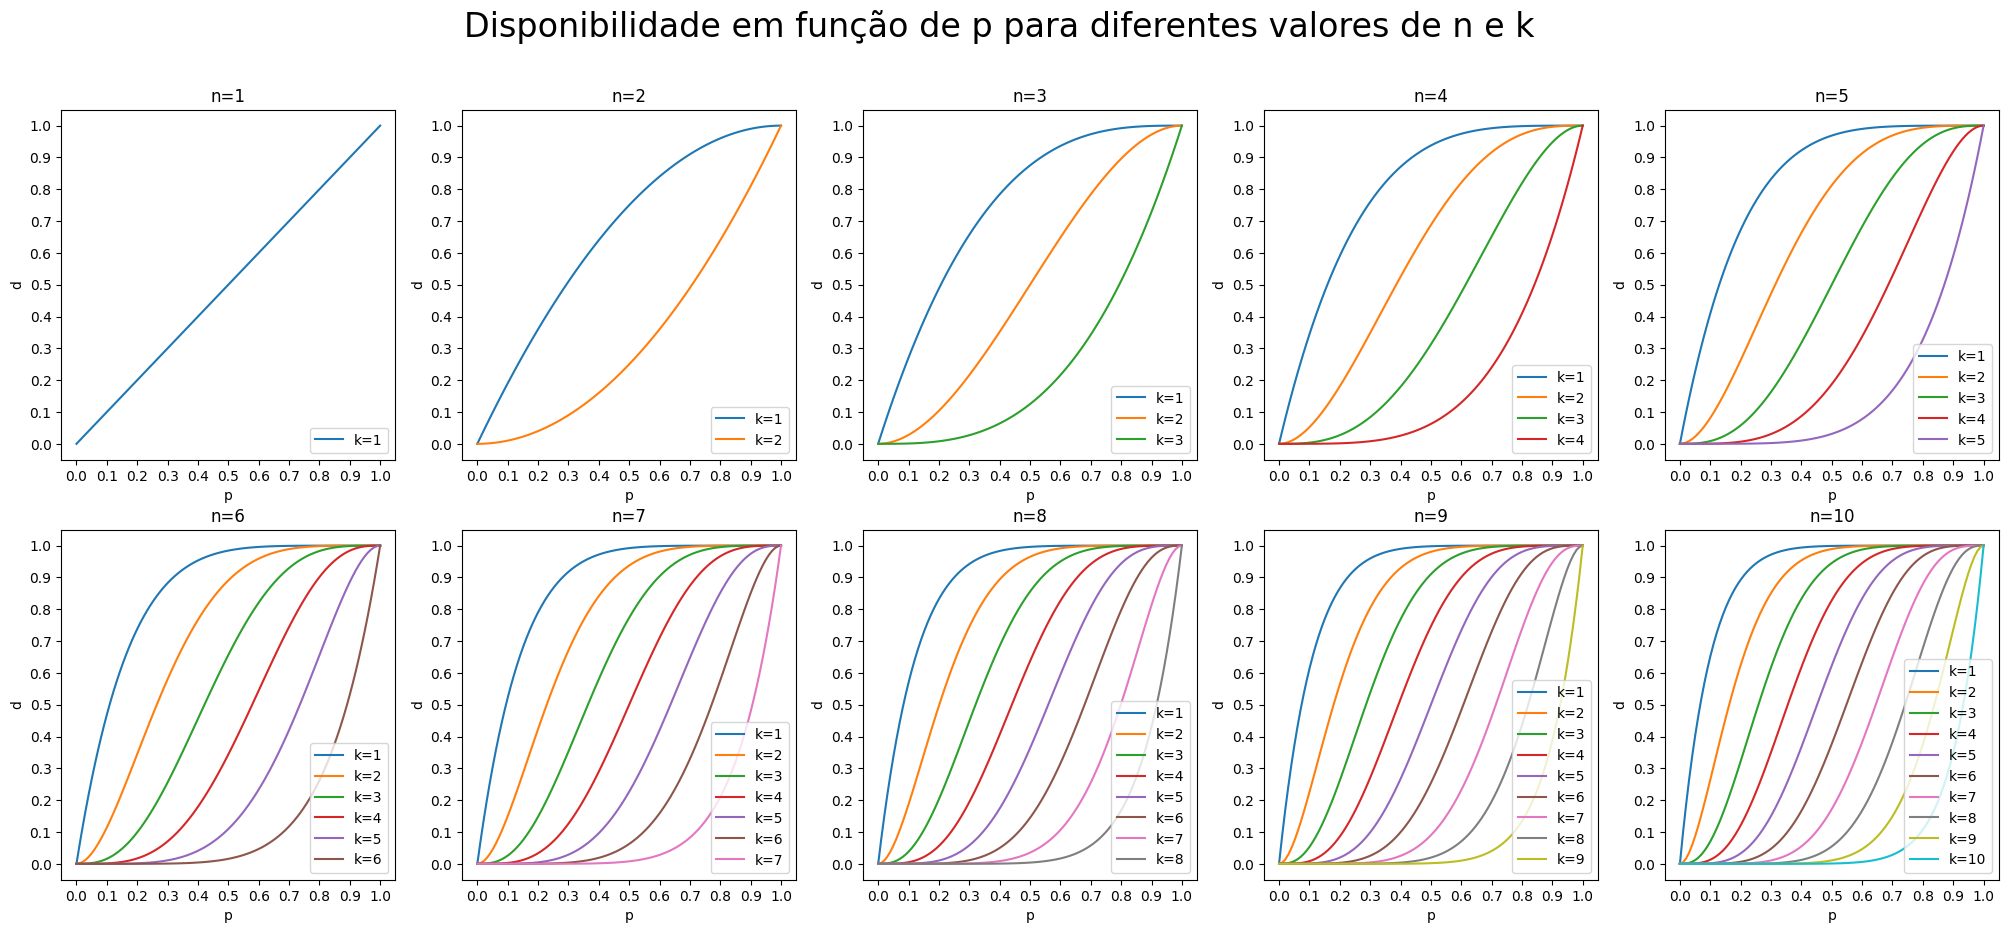

In [42]:
plt.figure(figsize=(25, 10))
plt.suptitle('Disponibilidade em função de p para diferentes valores de n e k', fontsize=24)
# plotar resultados em p vs d para diferentes valores de n e k
for ni in n:
    plt.subplot(2, 5, ni)
    for ki in k:
        if ki <= ni:
            subset = dados[(dados["n"] == ni) & (dados["k"] == ki)]
            plt.plot(subset["p"], subset["d"], label=f'k={ki}')
            plt.title(f'n={ni}')
            plt.xlabel('p')
            plt.ylabel('d')
            plt.xticks(np.arange(0, 1.1, 0.1))
            plt.yticks(np.arange(0, 1.1, 0.1))
            plt.legend(loc='lower right')
plt.show()

In [44]:
from simulador import StochasticSimulator
# validar resultados com simulador estocástico
iters = [10, 100, 1000, 10000]
results = pd.DataFrame(
    [(ni, ki, pi, it) for ni in n for ki in k for pi in p for it in iters if ki <= ni],
    columns=["n", "k", "p", "iterations"],
)
results["d_sim"] = results.apply(lambda row: StochasticSimulator(n=int(row["n"]), k=int(row["k"]), p=row["p"]).run_simulation(int(row["iterations"])), axis=1)
results["d_analitico"] = disponibilidade_vec(results["n"], results["k"], results["p"])
results["error"] = np.abs(results["d_sim"] - results["d_analitico"])
results

,n,k,p,iterations,d_sim,d_analitico,error
0,1,1,0.000000,10,0.0000,0.000000,0.000000
1,1,1,0.000000,100,0.0000,0.000000,0.000000
2,1,1,0.000000,1000,0.0000,0.000000,0.000000
3,1,1,0.000000,10000,0.0000,0.000000,0.000000
4,1,1,0.010101,10,0.0000,0.010101,0.010101
...,...,...,...,...,...,...,...
21995,10,10,0.989899,10000,0.9085,0.903460,0.005040
21996,10,10,1.000000,10,1.0000,1.000000,0.000000
21997,10,10,1.000000,100,1.0000,1.000000,0.000000
21998,10,10,1.000000,1000,1.0000,1.000000,0.000000


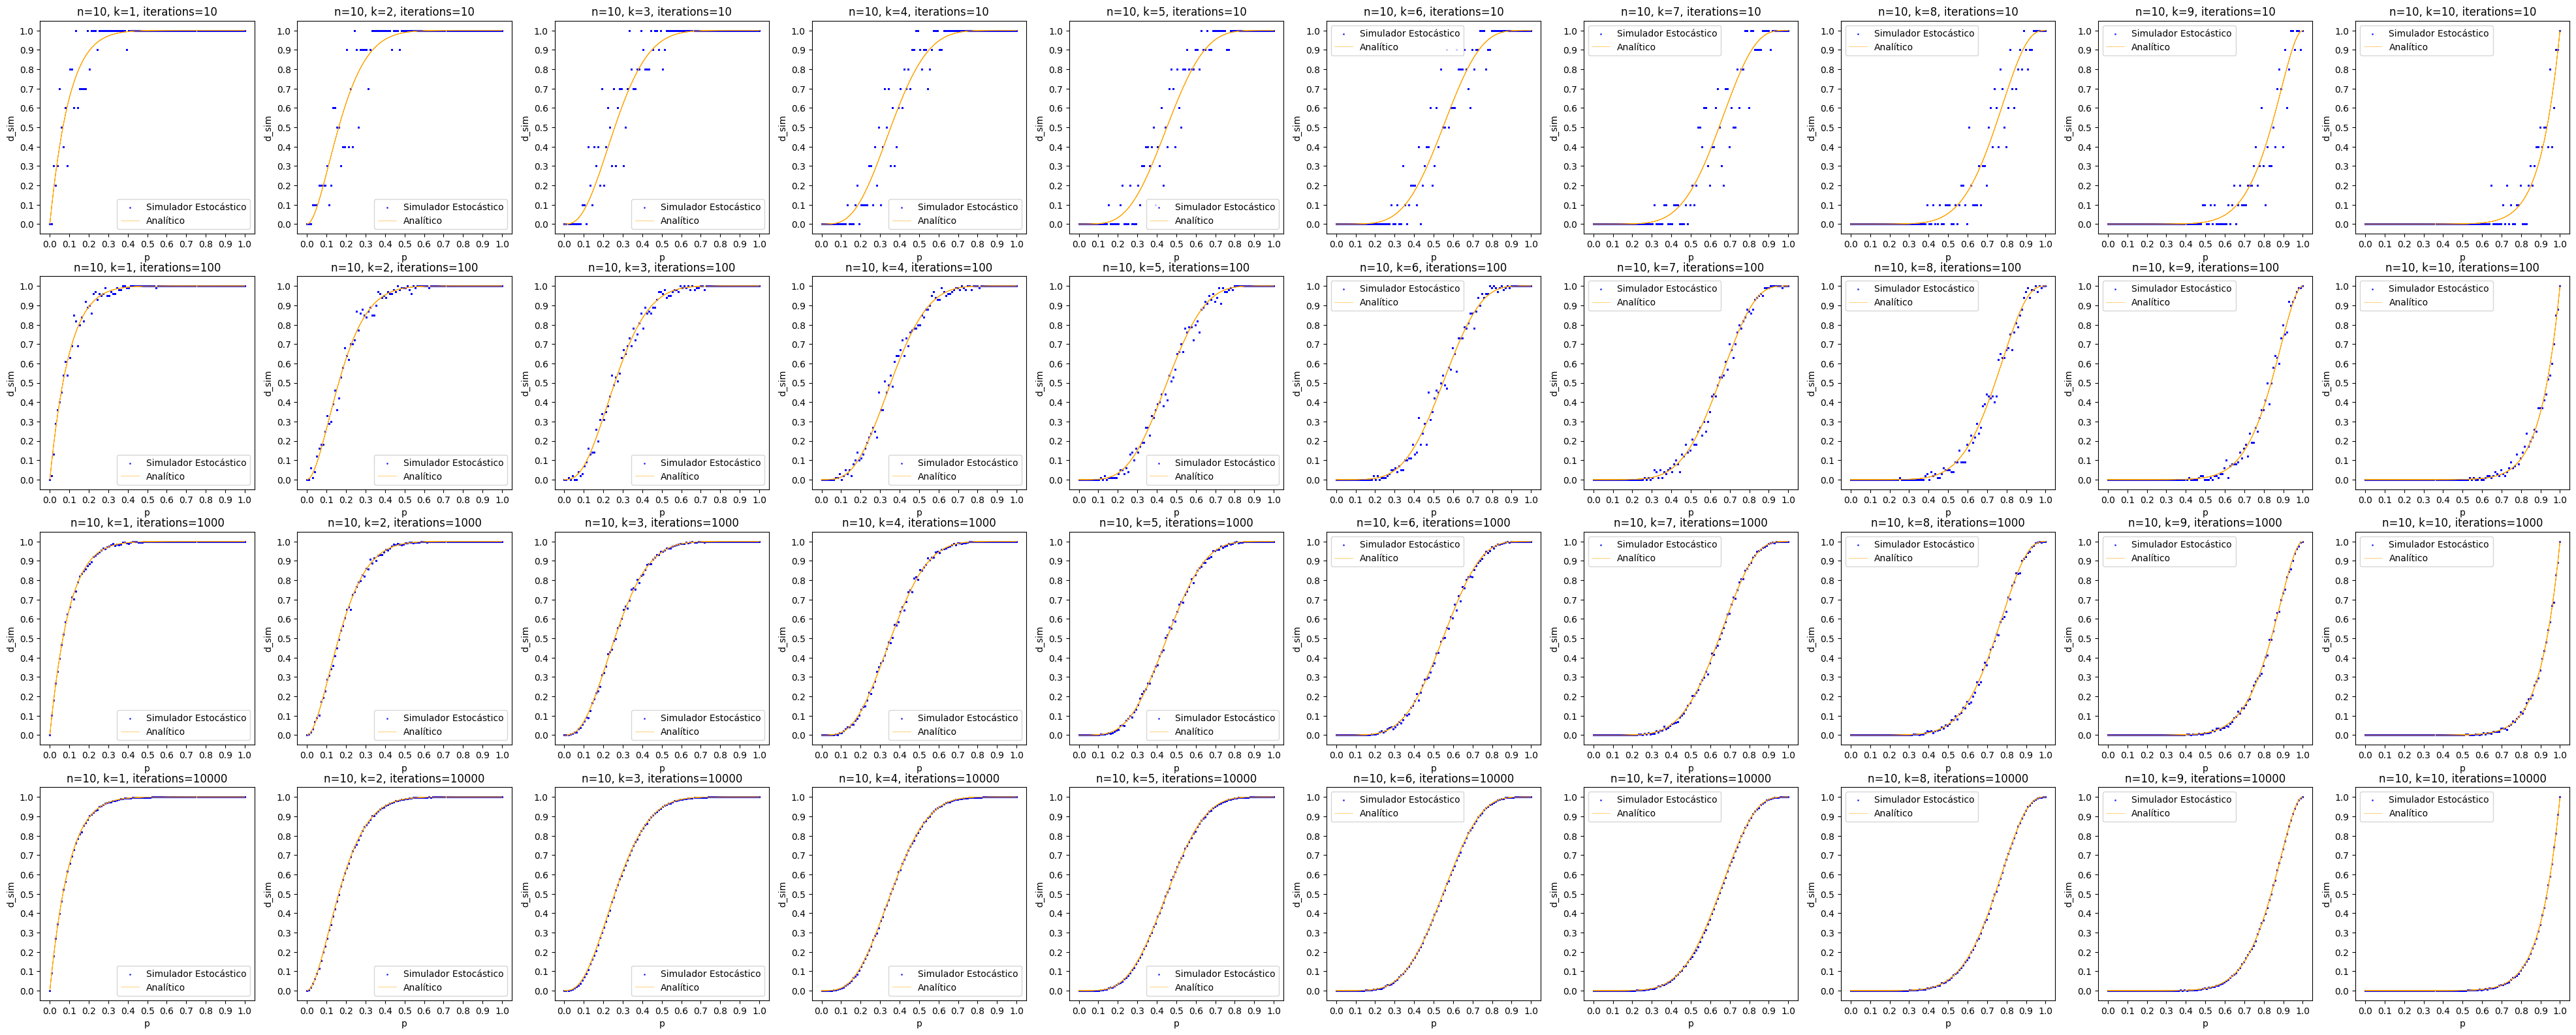

In [55]:
# plotar resultados do simulador estocástico vs resultados analíticos
plt.figure(figsize=(50, 50))
for n in range(1, 11):
    for row, ii in enumerate(iters):
        for col, ki in enumerate(k):
            subplot = (10, 10, (row * 10) + col + 1)
            plt.subplot(*subplot)
            plt.title(f'n=10, k={ki}, iterations={ii}')
            plt.xlabel('p')
            plt.ylabel('d_sim')
            plt.xticks(np.arange(0, 1.1, 0.1))
            plt.yticks(np.arange(0, 1.1, 0.1))
            subset = results[(results["n"] == 10) & (results["k"] == ki) & (results["iterations"] == ii)]
            # print(subset)
            plt.scatter(subset["p"], subset["d_sim"], label='Simulador Estocástico', color='blue', s=1, alpha=0.75)
            subset = dados[((dados["n"] == 10) & (dados["k"] == ki))]
            plt.plot(subset["p"], subset["d"], label='Analítico', color='orange', linewidth=0.5, alpha=0.75)
            plt.legend(['Simulador Estocástico', 'Analítico'])
plt.show()